In [1]:
## Params and loading packages

## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
annotation=doc['annotation']
tss_annotation=doc['tss_annotation']



import os
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
#mpl.style.use('fivethirtyeight')
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
#%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
from cycler import cycler
from Modules.Homer import *

%matplotlib inline

print('Number of tissues: ',len(tissues))

### Till here

('Number of tissues: ', 16)


## Distance to TSS

In [2]:
tss = pd.read_csv(tss_annotation,sep='\t',index_col=0)

In [3]:
txn_pd = pickle.load(open("Results/txn_df.p",'rb'))

In [4]:
anno_peaks = pd.read_csv('Results/peaks_with_tss_and_gene.tsv',sep='\t',index_col=0)
anno_peaks = anno_peaks[(~(anno_peaks['Distance to TSS']==np.infty))]
anno_peaks = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 2000]

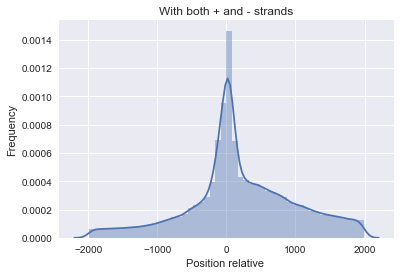

In [5]:
sns.distplot(anno_peaks['Distance to TSS'])
plt.ylabel('Frequency')
plt.title('With both + and - strands')
plt.xlabel('Position relative ')
plt.savefig("Results/Distance_to_TSS_neg_included.png")

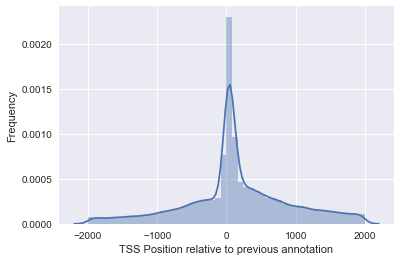

In [6]:
sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Distance_to_TSS.png",bbox_inches='tight')

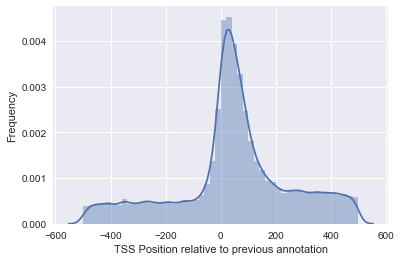

In [7]:
anno_500 = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 500]
sns.distplot(anno_500[anno_500['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Distance_to_TSS_500.png",bbox_inches='tight')

### Look at ones only in CHO

In [8]:
peak_tissue_matrix = pd.read_csv('Results/merged/peaks_tissues.csv',index_col=0)
peak_tissue_matrix = peak_tissue_matrix[peak_tissue_matrix.index.isin(anno_peaks[anno_peaks['isSameStrand']].index)]

## Take the max between the two
cho_peaks = peak_tissue_matrix.loc[:,peak_tissue_matrix.columns.str.contains('CHO')].max(axis=1)

## cho_peaks greater than 0
cho_peaks = cho_peaks[(cho_peaks>0)].index #

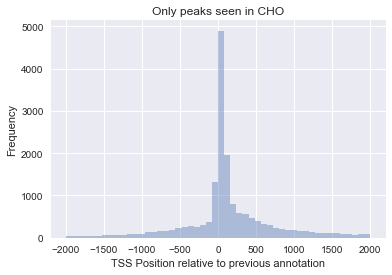

In [9]:
sns.distplot(anno_peaks[anno_peaks['isSameStrand']].loc[cho_peaks,'Distance to TSS'],norm_hist=False,kde=False)
plt.title('Only peaks seen in CHO')
plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Distance_to_TSS_CHO.png",bbox_inches='tight')